# Titanic

Let's go)

------------


**Часть 1: Анализ данных:**

1) Анализ особенностей.

2) Поиск любых отношений или трендов с учетом множества фич.

**Часть 2: Разработка функций и очистка данных:**

1) Добавление нескольких фич.

2) Удаление избыточных фич.

3) Преобразование фич в подходящую вид для моделирования.

**Часть 3: Прогностическое моделирование**

1) Выполнение основных алгоритмов.

2) Кросс-валидация.

3) Ensembling.

4) Важные особенности Экстракция.

## Часть 1: Анализ данных:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Посмотрим сколько у нас пропусков в данных.

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Возраст (Age), каюта (Cabin) и порт высадки (Embarked) имеют NaN значения. Попробуем это пофиксить.

**Статистика выживших:**

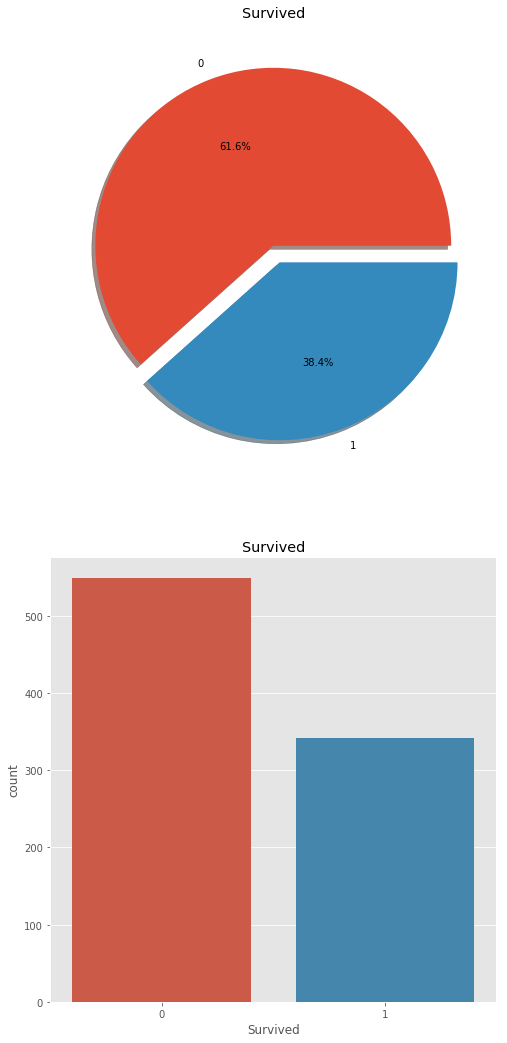

In [7]:
f,ax=plt.subplots(2,1,figsize=(8,18))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Из 891 пассажира в тренировочной выборке выживших всего ~350 человек.Тоесть 38,4% от всей тренеровочной выборки пережили катастрофу. Нужно пойти глубже, чтобы лучше понять данные и посмотреть, какие категории пассажиров выжили, а какие нет.

Мы постараемся проверить уровень выживаемости, используя различные особенности набора данных. Некоторые из особенностей - Пол (Sex), Порт Высадки (Embarked), Возраст (Age) и т.д.

## Анализ фич

### Пол (Sex)

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

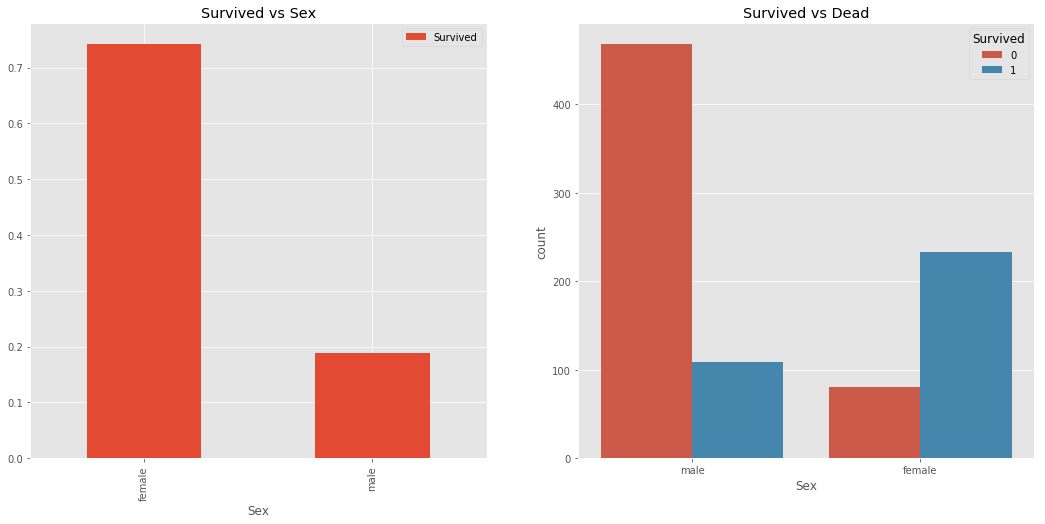

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

Похоже мы нашли нечто интересное. Во первых, количество мужчин на корабле сильно больше чем женьщин. Еще, количество спасенных женьщин в два раза больше чем мужчин. В среднем женьщина спасется с вероятностью в 75%, а мужчина с вероятностью 19%. Боль.

Эта фича выглядит давольно важной, посмотрим остальные.

### Класс состоятельности (Pclass)

1st = Высший класс

2nd = Средний класс

3rd = Низший класс

In [10]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


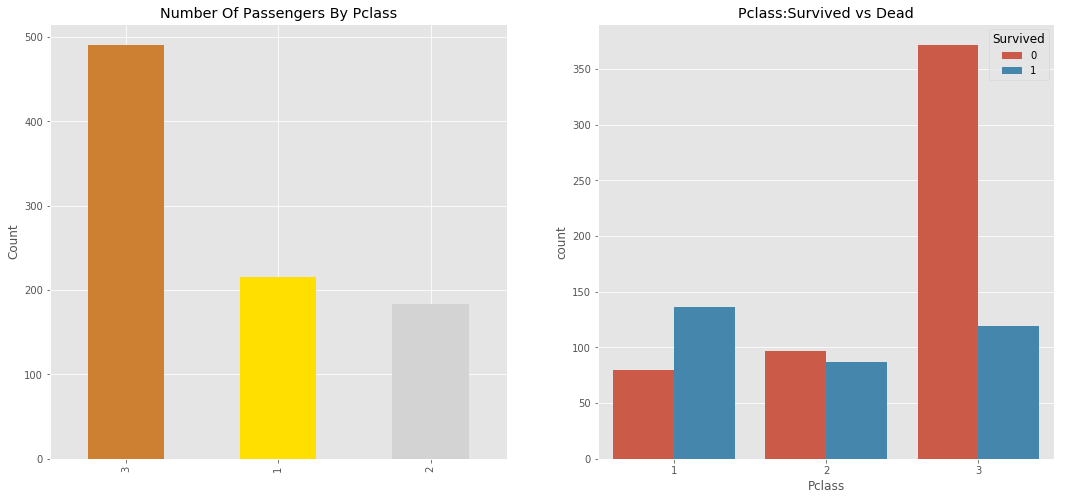

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

На данных графиках отчетлво видно что пассажиры первого класса получают высокий приоритет на спасение. Несмотря на то, что количество пассажиров третьего класса на много больше чем первого, выживаемостьу них составляет около 25%. 
Для пассажиров первого класса выживаемость составляет около 64%, второй класс - 48%. Как мы видим, деньги играют важную роль. Hello cruel world.

Проверим выживаемость по полу и классу.

In [12]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

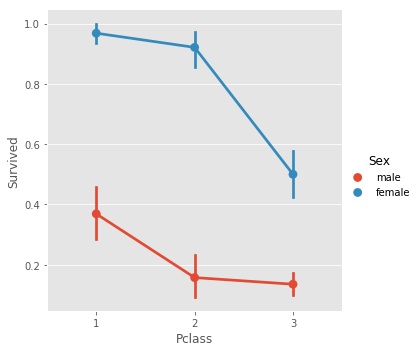

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Заюзаем **FactorPlot** , будет луше видно разделение на категории.

Подведя итог по этим двум графикам, можно сказать, женьщины первого класса выживают с 95% вероятностью, так как умерли 3 из 94 женьщин первого класса.

В принципе женьщинам был предоставлен приоритет во время спасения, даже по сравнению с мужчинами первого класса.

Попробуем дальше посмотреть класс пассажиров.

### Возраст (Age)

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


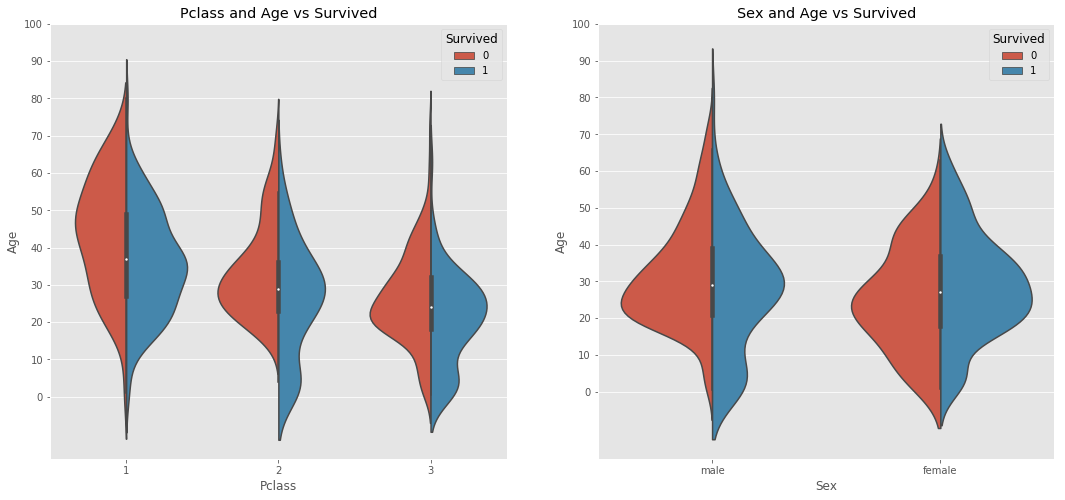

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Что мы выяснили:

1) Количество дитей растет вместе с классом пассажиров и шанс выживания для детей младше 10 лет, выглядит хорошо независимо от класса.

2) Шанс выживания пассажиров в возрасте 20-50 лет из класса 1 высоки, даже выше чем для женьщин.

3) Для мужчин, шанс выживания падает с ростом возраста.


Так же как мы и писали ранее, в данных о возрасте есть пропуски. Решить эту проблему можно заменив NaN на средний возраст. Правда тут появляется небольшая проблема, разброс возрастов очень велик и может выйти так что мы присвоим 7-летнему мальчику, 30 лет. Нужно найти способ избежать таких случаев. В глаза бросается приписка к имени Mr или Mrs. 

In [16]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

Регулярка как раз допускает все буквы до точки.

Выведем все обращения:

In [17]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Заменим все "кривые" обращения на Mrs, Ms, Miss.

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Глянем распределение обращений:

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Заменим значения NaN в соответствии с обращениями:

In [20]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

Проверим что все NaN были заменены:

In [21]:
data.Age.isnull().any()

False

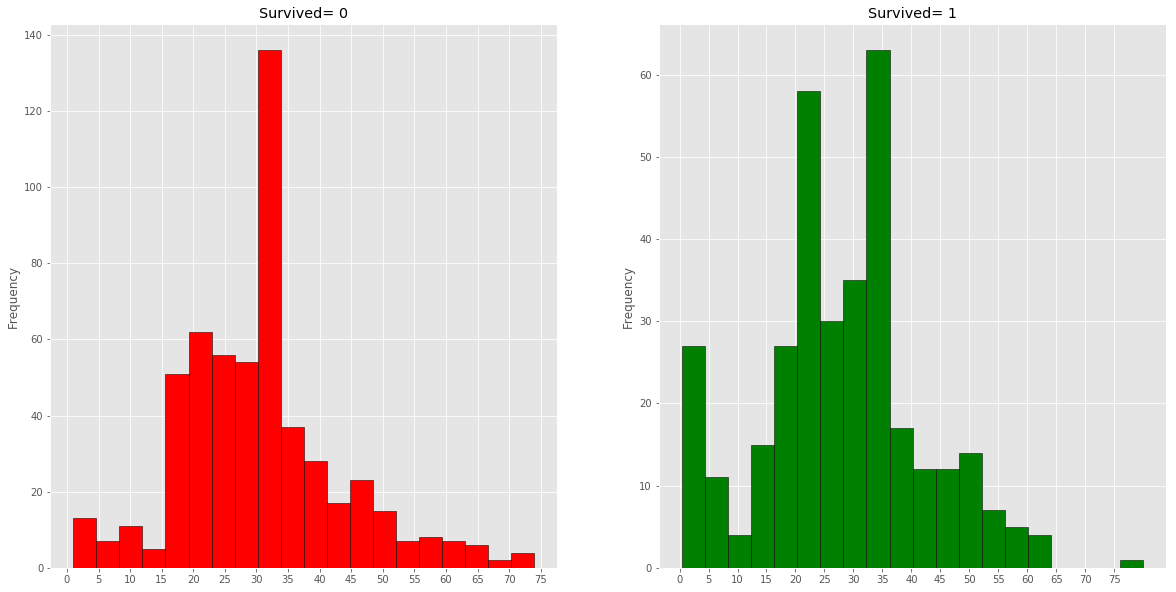

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,80,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,80,5))
ax[1].set_xticks(x2)
plt.show()

1) Малыши (возраст < 5) многие спасены.

2) Пожилые пассажиры также многие спасены.

3) Большая часть смертей лежит на пассажирах 30-40 лет.


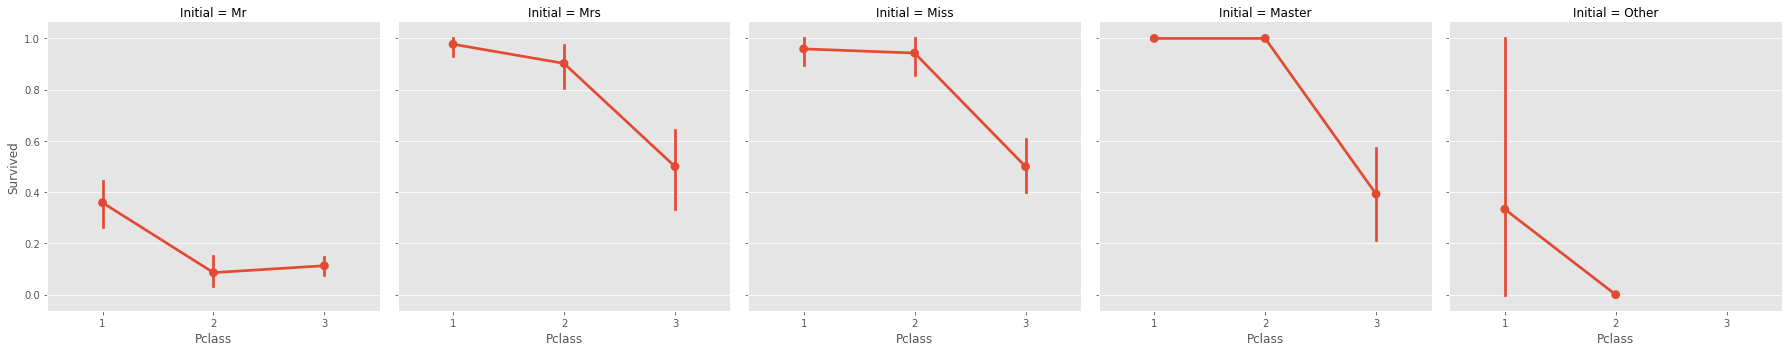

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

Таким образом, политика «Женщины и ребенок» остается верной независимо от класса.

### Порт посадки (Embarked)



In [24]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**Шнас выжить в зависимости от порта посадки**

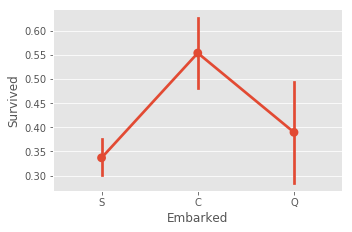

In [25]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Шанс выживания для порта высадки С наиболее высокий, около 0.55, а самый низкий в S.

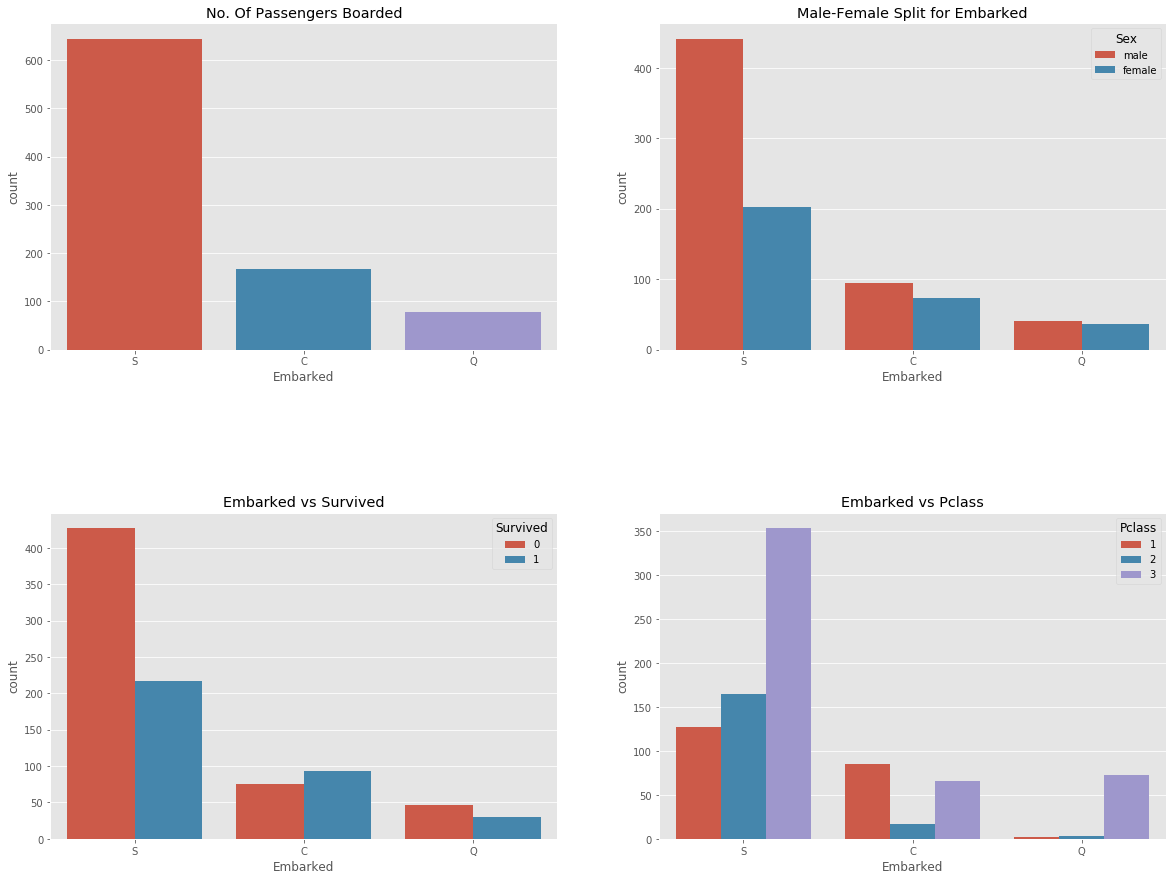

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) Большая часть пассажиров села в порту S. Оснавная часть из которых относится к классу 3.

2) Пассажиры из порта С тоже имеют неплохой шанс выживания. Возможно причиной этого может являться то, что ввсе они из класса 1 и 2.

3) В порту S садились наиболее богатые люди. Их вероятность выживания оказалось давольно низкой, это связано с тем, что они все класса 3, которых погибло около 81%.

4) С порта Q 95% пассажиров класса 3.

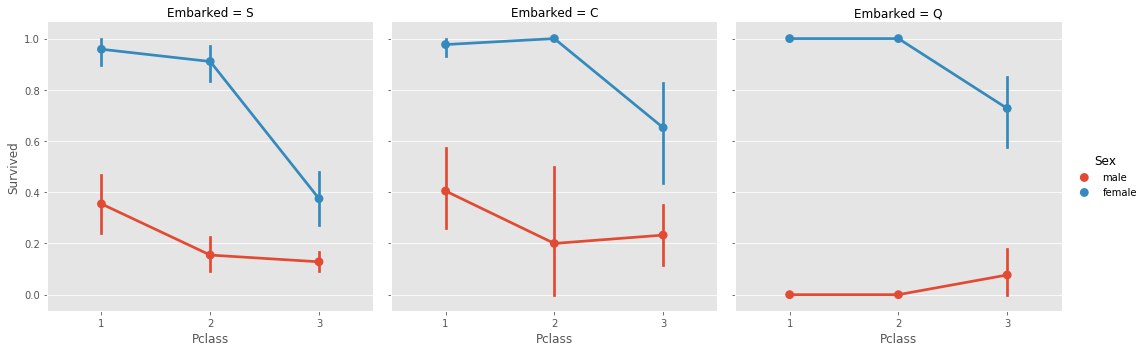

In [27]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()


1) Шанс выживаня всегда 1 для женьщин, что для класса 1 или 2, класс не влияет на вероятность.

2) Порт S выглядит не очень "удачливым" для пассажиров класса 3, шанс выживания что женьщин, что мужчин очень низкий. 

3) Порт Q более неудачлив для мужчин, поскольку все они из класса 3.

В данных о порту посадки есть пропуски, заполним их портом S так как он у большинства.

In [28]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

### Семьи (SibSip)

Этот признак описывает был пассажир один или с семьей.

Sibling = брат, сестра, сводный брат, сводная сестра

Spouse = муж, жена


In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


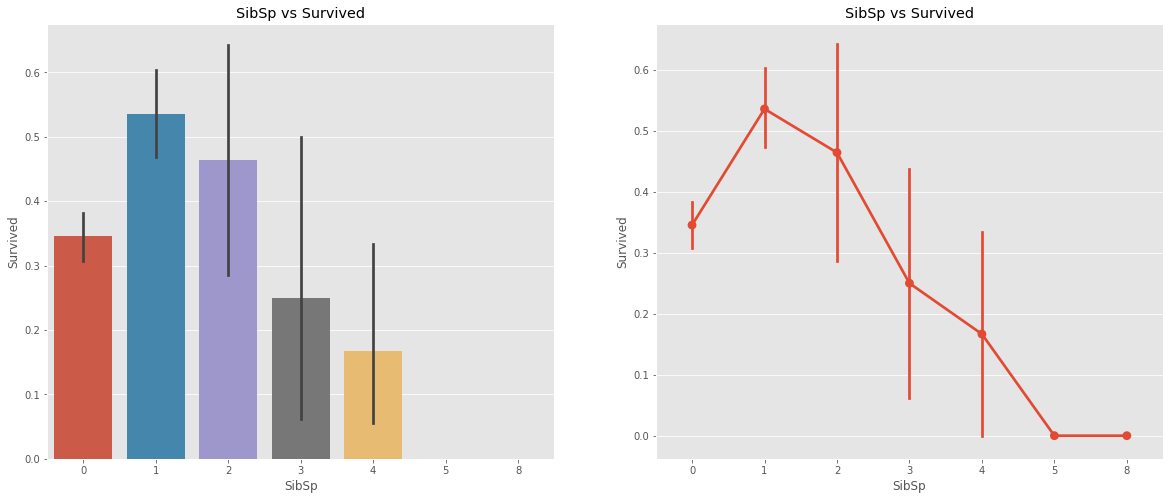

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Графики показывают нам, что если пассажир один без родных, он имеет шанс 34.5% шанс выжить. График быстро падает если число родных растет. Похоже это имеет смысл. Если бы я ехал с семьей, то постарался бы спасти их, а не себя. Шанс выжить семье с 5-8 человек нулевой. Может быть в этом виноват клас?

Таблица показывает, что все семейные пассажиры с 3 и более человек, все в классе 3.

In [32]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


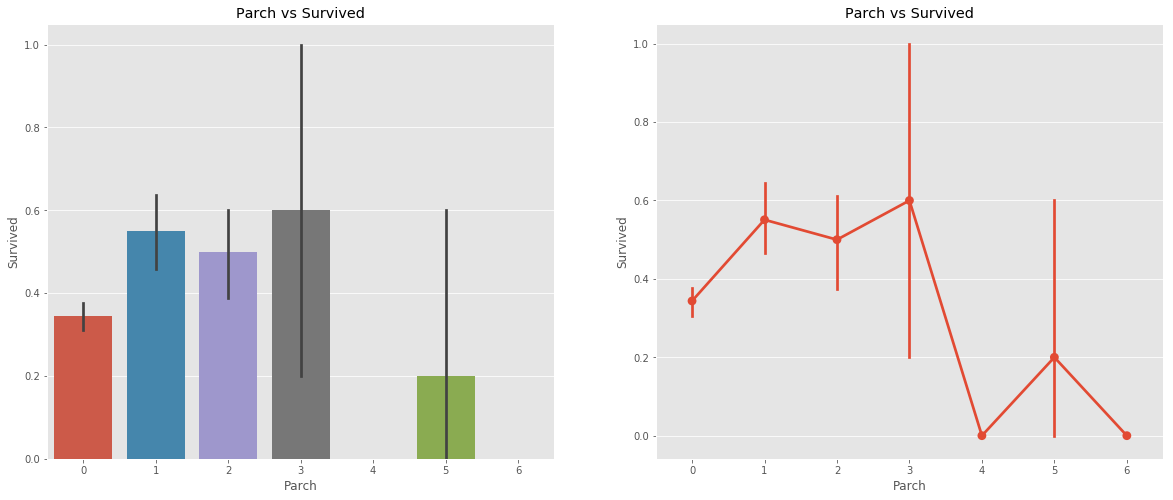

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Результаты схожи с предыдущими. Пассажиры с родителями на борту имеют хорошие шансы выжить. Шанс уменьшается как только количество человек растет.

Шанс выживания хороший для семьи из 1-3 человек. Одиночки так же как и семьи с 4 и более, имеют очень маленькие шансы на выживание.

### Тариф (Fare)

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Забавно увидеть минимальный тариф - 0.0

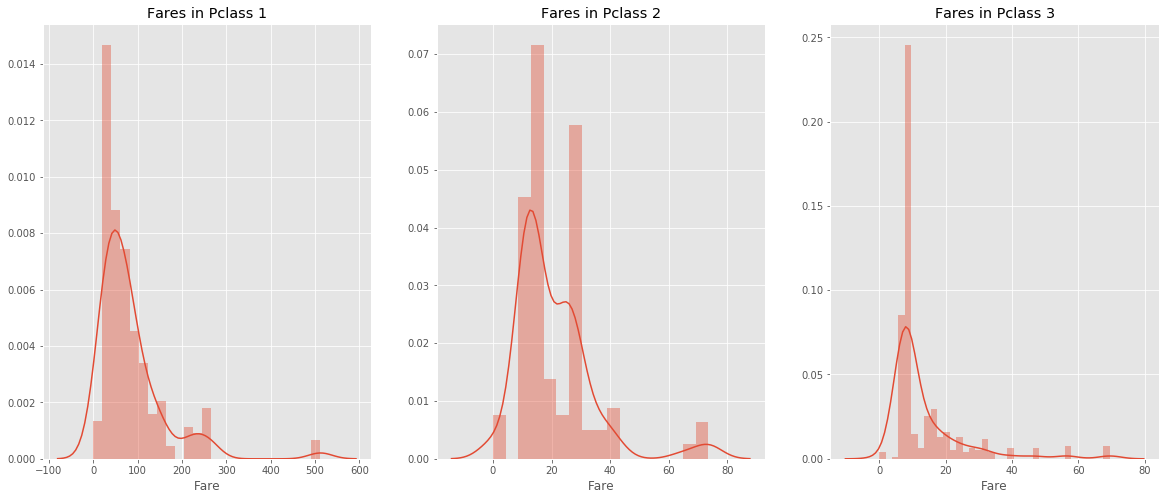

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

#### Подведем итоги:

**Пол (Sex):** шанс выживания женьщин на много выше по сравнению с мужчинами.

**Класс пассажира (Pclass):** есть ощутимая зависимость от класса, к примеру пассажиры 1-го класса, имеют наиболее высокий шанс выжить. Для класса 3, шанс выживаемости очень низок. Для женьщин шанс выживания для класса 1 равен 1, но и для класса 2 так же высок.

**Возраст (Age):** дети с возрастом 5-10 имеют выский шанс выжить. Пассажиры с 15 до 35 многие погибли.

**Порт посадки (Embarked):** очень странные результаты получились. Шанс выжить тех кто сел в С выглядят даже лучше чем пассажиры класса 1 из порта S. Пассажиры же из порта Q все 3-го класса.

**Семья (SibSp\Parch):** те кто имеют 1-2 брата\сестры на борту или 1-3 родителей имеют хороший шанс выжить по сравнению с одиночками. Если же семья большая вместе (>4) то щанс выжить стримительно падает.

### Построим хитмап и глянем на корреляцию:

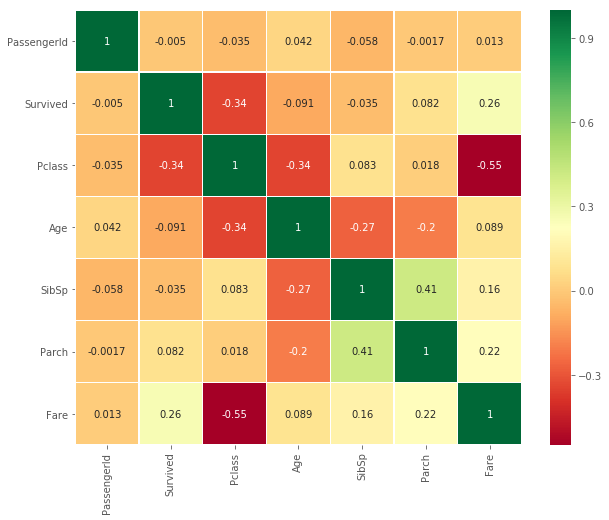

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

В данном случае, мы можем посмотреть корреляцию лишь для численных фич, фичи в которых строки не рассматриваются.

Как можно увидеть их хитмапы, фичи не очень то и коррелируют, SipSp и Parch можно не рассматривать, так как они являются схожими по смыслу фичами.

## Доработка фич и очистка данных

Это все делается для дальнейшей постройки моделей и возможного улучшения интерпретабельности фич.

### Возраст (Age)

Попробуем сгруппировать возраст, превратить его в категориальную фичу. Сделать это напрямую 1 к 1 не очень хорошо, так как иметь 80 категорий это очень не удобно. Попробуем разделить возраст на 5 частей (хорошо делится) в итоге 80/5=16. Значит размер группировки будет по 16 лет.

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


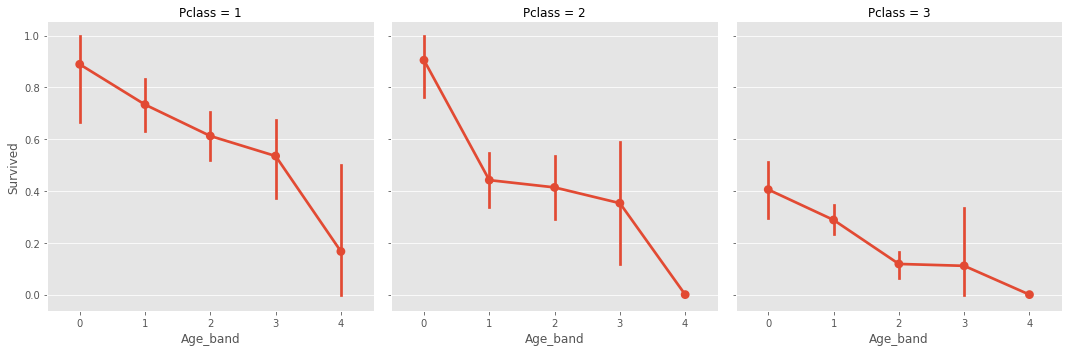

In [39]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

Как мы и выяснили в прошлом, с увеличением возраста, шанс выжить падает, независимо от класса.

### Размер семьи (Family)

Создадим новую фичу, даже две, назовем их Family_size и Alone. Эти фичи будут сгененрированы из Parch и SibSp. 

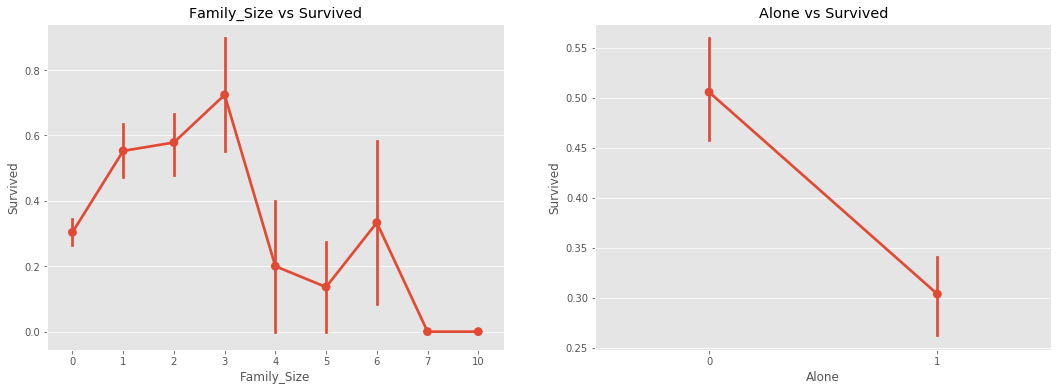

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size = 0 означает, что пассажир один.

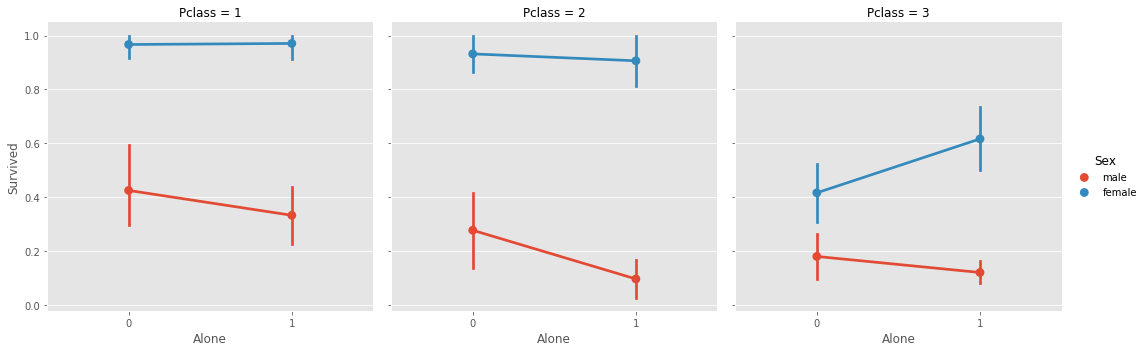

In [41]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

Видно, что путешествие одному не зависимо от пола или класса, всегда понижает шансы на выживание.

### Fare

Еще одна численная фича, перевдем ее. Для этого есть удобная функция pandas.qcut.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Как и было рассмотрено ранее, с ростом платы за билет шанс выжить повышался.

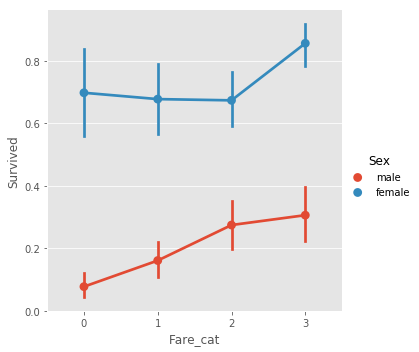

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### Конвертация остальных буквенных значений в числа


In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Удалим ненужные фичи

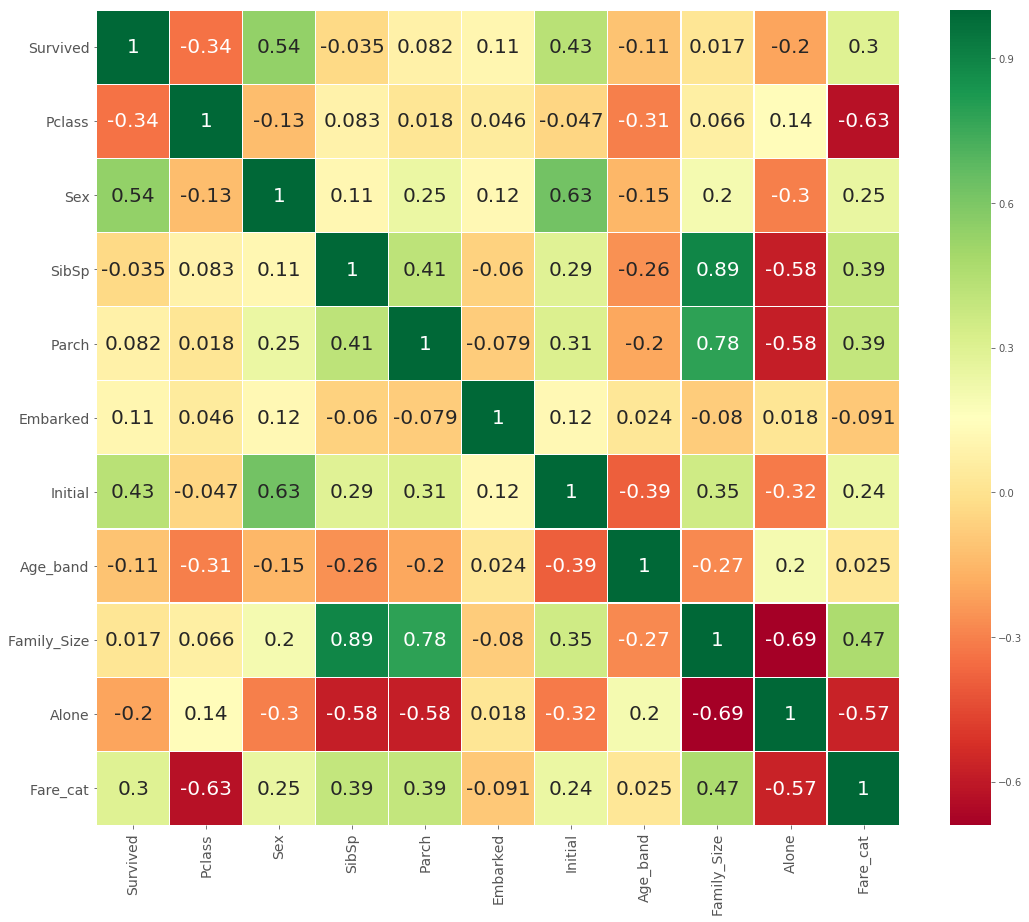

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Теперь можно приступить к моделированию.

## Моделирование

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Метод опорных векторов (радиальный)

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Метод опорных векторов (линейный)

In [49]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Логистическая регрессия

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


### Дерево решений

In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K ближаших соседей

In [52]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


Поиграемся немного с гиперпараетрами. По умолчанию, функция берет 5 ближайших соседей. Построим график завиимости этого гперпараметра от точности предсказания.

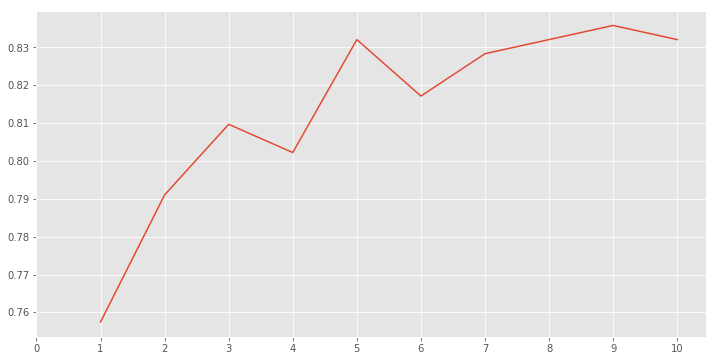

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [53]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Наивный байесовский классификатор

In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Случайный лес

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


Пока мы тестировали на одной и той же разбивке данных на тестовые и для обучения. Может по этому во всех результатах мы находимся около 90%. Для  решения этой проблемы воспользуемся кросс валлидацией.

### Кросс валидация

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.808102,0.027092
Naive Bayes,0.801386,0.028999
Random Forest,0.814856,0.035351


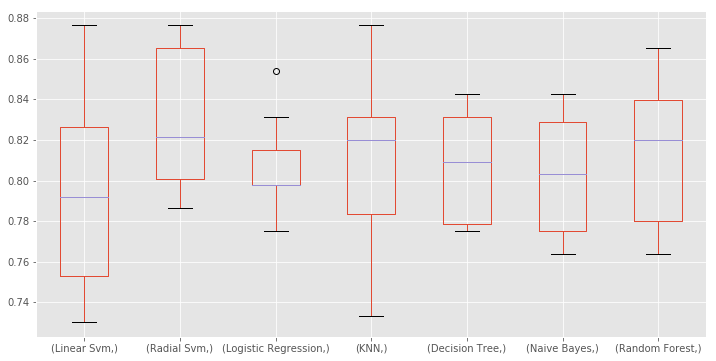

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

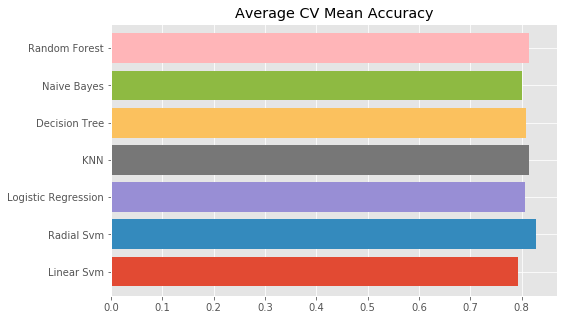

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Точность классификации иногда может вводить в заблуждение. Мы можем получить обобщенный результат с помощью матрицы путаницы, которая показывает, где модель пошла не так, или какой класс модель предсказала неправильно.

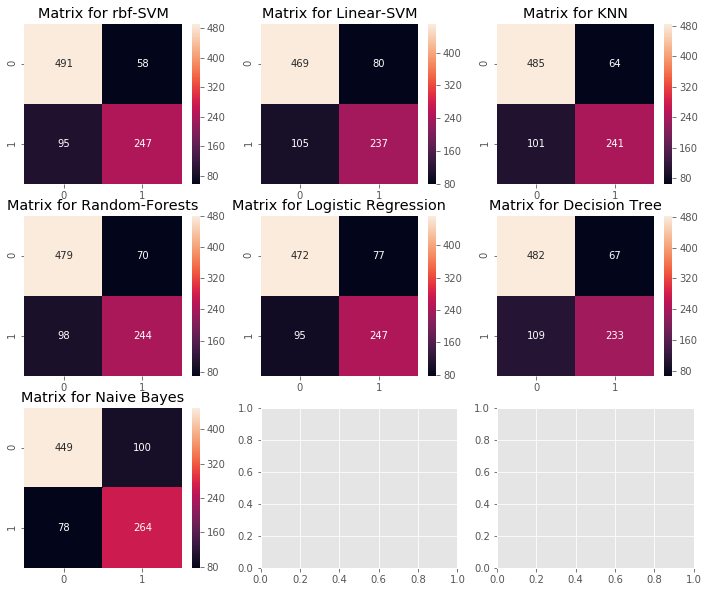

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Левая диагональ показывает количество правильных предсказаний, сделанных для каждого класса, в то время как правая диагональ показывает количество сделанных неправильных предсказаний. Рассмотрим первый график для радиальных опорных векторов:

1) Нет. правильных прогнозов 491 (для погибших) + 247 (для выживших) со средней точностью CV (491 + 247) / 891 = 82,8%, которую мы получили раньше.

2) Ошибки -> Неправильно классифицировано 58 погибших как выживших и 95 выживших как мертвых. Таким образом, он совершил больше ошибок, предсказав погибших как выживших.

Рассматривая все матрицы, мы можем сказать, что у rbf-SVM больше шансов в правильном прогнозировании погибших пассажиров, но у NaiveBayes больше шансов в правильном прогнозировании пассажиров, которые выжили.

### Поработаем с гипер-параметрами моделей

#### Метод опорных векторов


In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.2s finished


#### Случайный лес

In [61]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   10.4s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Лучший результат для Rbf-Svm это 82.82% с C=0.05 и gamma=0.1. Случайый лес 81.8% с n_estimators=900.

### Комбинируем модели

1)Voting Classifier

2)Bagging

3)Boosting.

#### Voting Classifier

Это самый простой способ объединения прогнозов из множества различных простых моделей машинного обучения. Это дает средний результат прогнозирования на основе прогноза всех подмоделей. Субмодели или базовые модели имеют разные типы.

In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237660310974917


#### Bagging

**KNN**

In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


**Bagged DecisionTree**

In [64]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


### Boosting

**AdaBoost**

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


#### Stochastic Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())


The cross validated score for Gradient Boosting is: 0.8182862331176939


#### XGBoost  (ОШИБКА ЯДРА)

In [67]:
# import xgboost as xg
# xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
# print('The cross validated score for XGBoost is:',result.mean())

#### Hyper-Parameter Tuning for AdaBoost

In [68]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.9min finished


Наилучшая точность AdaBoost - 83.16% с n_estimators=200 и learning_rate=0.05

### Матрица ошибок (Confusion Matrix)

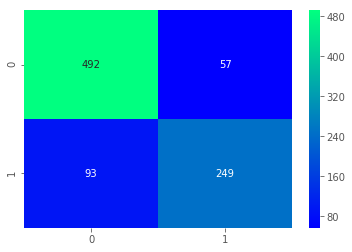

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Вклад фич

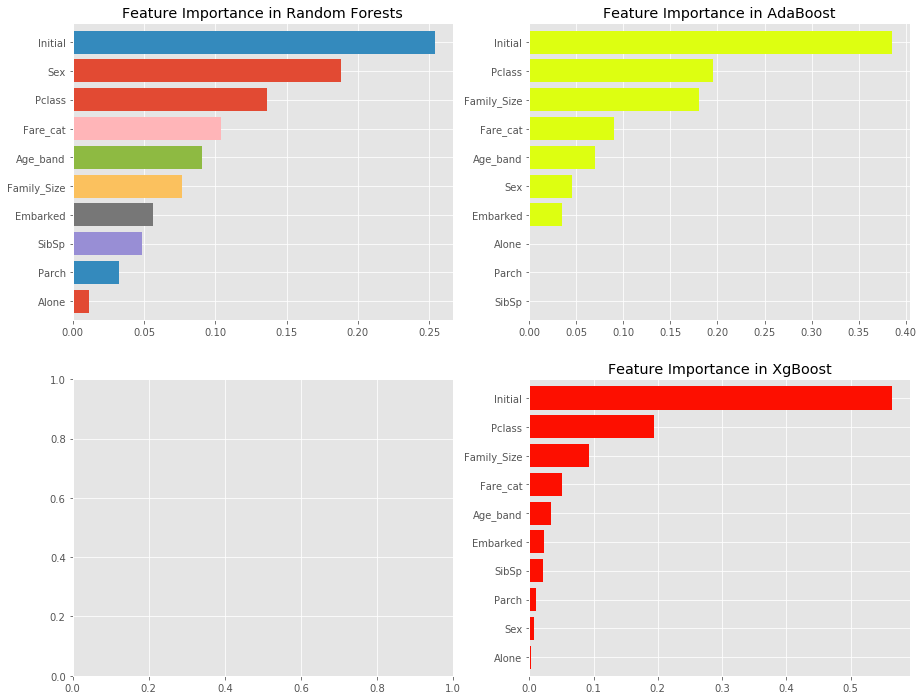

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
# ax[1,0].set_title('Feature Importance in Gradient Boosting')
# model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

Мы видим важные функции для различных классификаторов, таких как RandomForests, AdaBoost и т. Д.

1) Некоторые из важных важных фич: Initial, Fare_cat, Pclass, Family_Size.

2) Кажется, что особенность Sex не имеет никакого значения, и это шокирует, как мы видели ранее, когда Sex в сочетании с Pclass давала очень хороший дифференцирующий фактор. Sex выглядит важным только в RandomForests.

Тем не менее, мы можем видеть фичу Initial, которая находится на вершине во многих классификаторах. Мы уже видели положительную корреляцию между полом и начальной, поэтому они оба относятся к полу.

3) Точно так же Pclass и Fare_cat относятся к статусу пассажиров и Family_Size с Alone, Parch и SibSp.